D:\anaconda\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


40 80 0 44


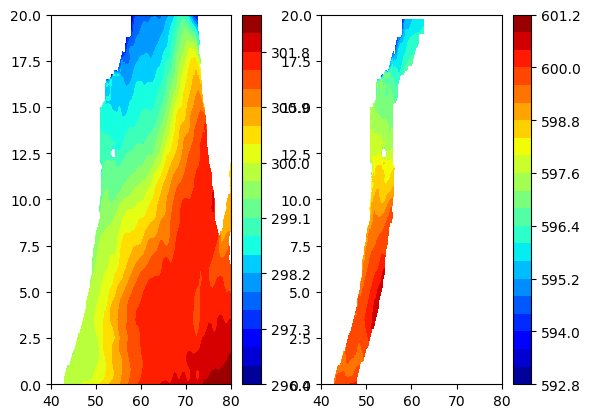

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import function
import matplotlib.colors as mcolors
from netCDF4 import Dataset
file='E:\\data\\oras5\\somali-oras5\\no_cycle_MLD_every_term_climate.nc';ds = xr.open_dataset(file);#ds=ds.assign_coords(time=time)
ild=ds.ild; mld=ds.mld;
mlt=ds.mlt; T_n=ds.T_n;
mlu=ds.mlu; mlv=ds.mlv;
Qnet=ds.Qnet; Qpen=ds.Qpen; Q=ds.Q;
He_24=ds.He_24;
mask=ds.mask;
mlt_tend=ds.mlt_tend;
dhdt=ds.dhdt; wsgn=ds.wsgn;ver_adv=ds.ver_adv; Wh=ds.Wh
VER=ds.VER
lon=ds.longitude;lat=ds.latitude
'''ADV'''
file1="E:\data\era5\era5_40~80E_uwind_vwind_at_evap_lhf_lwr_swr_shf_sst-1980-2023.nc";ds1=xr.open_dataset(file1);ds1=ds1.msnswrf
time=ds1.time[0:12];latitude=mlt.latitude;longitude=mlt.longitude
sal= xr.DataArray(mlt.data, coords=[time,latitude,longitude],dims=['time', 'lat','lon']);lat=sal.lat;lon=sal.lon;
int_U= xr.DataArray(mlu, coords=[time,latitude,longitude],dims=['time', 'lat','lon'])
int_V= xr.DataArray(mlv, coords=[time,latitude,longitude],dims=['time', 'lat','lon'])
from advection_rd_ml import advection_rd_ml
mnadv_climU,mnadv_climV,ekman,T1,h_eddy=advection_rd_ml(sal,lat,lon,time,int_U,int_V,1,-1)
adv_u=mnadv_climU.rename({'month': 'time','lat':'latitude','lon':'longitude'})*86400*30.41*-1;
adv_v=mnadv_climV.rename({'month': 'time','lat':'latitude','lon':'longitude'})*86400*30.41*-1

NSHF=(Q+mask)#.assign_coords(time=new_time_values1)
ADVx=(adv_u+mask)#.assign_coords(time=new_time_values1)
ADVy=(adv_v+mask)#.assign_coords(time=new_time_values1)
MLT_tendency=mlt_tend+mask
VER=VER+mask
colors='jet'
VER_weight_lon =VER.mean('longitude')
NSHF_weight_lon=NSHF.mean('longitude')
ADVx_weight_lon=ADVx.mean('longitude')
ADVy_weight_lat=ADVy.mean('latitude');
MLT_tendency_weight_lon=MLT_tendency.mean('longitude')
NSHF_1d=NSHF.mean('longitude').mean('latitude');NSHF_1d.plot(label='NSHF')
ADV_1d=(adv_u+mask+adv_v).mean('longitude').mean('latitude');ADV_1d.plot(label='ADV')
MLT_tendency_1d=mlt_tend.mean('longitude').mean('latitude');MLT_tendency_1d.plot(label='MLT')
VER_1d =VER.mean('longitude').mean('latitude');VER_1d.plot(label='VER');plt.legend()
Res_1d=MLT_tendency_1d.data-VER_1d.data-NSHF_1d.data-ADV_1d;#Res_1d.plot(label='RES')

file="E:\data\era5\era5_40~80E_uwind_vwind_at_evap_lhf_lwr_swr_shf_sst-1980-2023.nc"
ds0= xr.open_dataset(file);ds0=ds0.groupby('time.month').mean('time').rename({'month': 'time'})
ds0=ds0.reindex(latitude=list(reversed(ds0.latitude)))
era5_lh=ds0.mslhf;era5_lw=ds0.msnlwrf;era5_sw=ds0.msnswrf;era5_sh=ds0.msshf;era5_sst=ds0.sst
era5_Qnet=era5_lh+era5_sh+era5_lw+era5_sw
era5_mask=function.make_mask3D(era5_sst,5/(era5_sst.latitude.data[1]-era5_sst.latitude.data[0]),era5_sst)*0

C:\Users\panhong\AppData\Local\Temp\ipykernel_22856\3761868396.py:112: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig(f'E:\\data\\oras5\\fig\\fig5.pdf',format='pdf', dpi=300, transparent=True)
C:\Users\panhong\AppData\Local\Temp\ipykernel_22856\3761868396.py:112: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig(f'E:\\data\\oras5\\fig\\fig5.pdf',format='pdf', dpi=300, transparent=True)
D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


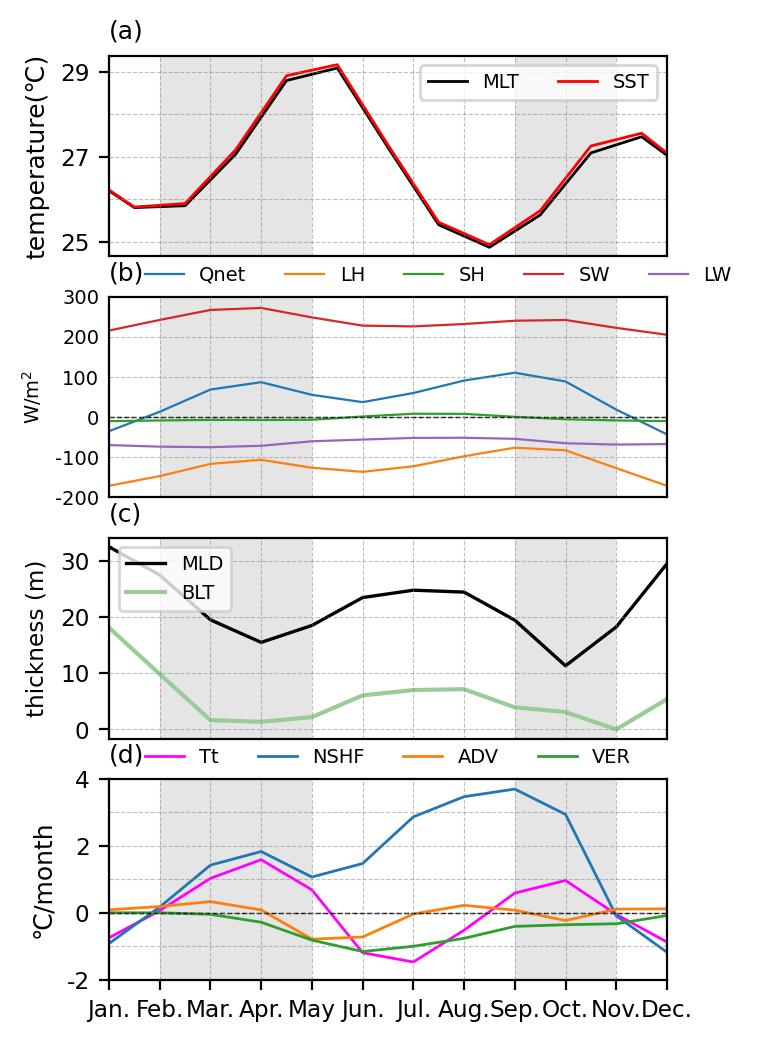

In [35]:
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig = plt.figure(figsize=(3.6,6),  dpi=200,#sharey=True,
                        constrained_layout=True)
gs = gridspec.GridSpec(4,1)#(4, 9)

# 定义不同大小的Axes
#ax1 = fig.add_subplot(gs[:2, 0:4])  # 占据第一行的前两列
#ax2 = fig.add_subplot(gs[2:4, 0:4])   # 占据第一行的最后一列
ax3 = fig.add_subplot(gs[0, 0])   # 占据第二行的第一列
ax4 = fig.add_subplot(gs[1, 0])   # 占据第二行的第二列
ax5 = fig.add_subplot(gs[2, 0])   # 占据第二行的最后一列
ax6 = fig.add_subplot(gs[3, 0])   # 占据第三行的全部三列

label=['a','b','c','d','e','f']
time=mld.time;

i=0;ax3.set_title(f'({label[i]})',fontsize=9,loc='left')
ax3.plot(np.arange(0.5,13.5,1),np.append((mlt+mask).mean('longitude').mean('latitude').data[-1],
                                         (mlt+mask).mean('longitude').mean('latitude').data),label='MLT',lw=1,ls='-',c='k');
#ax[i].plot(time,(sst+mask).mean('longitude').mean('latitude'),label='sst',lw=1,ls='--',c='g');
ax3.plot(np.arange(0.5,13.5,1), np.append((sst+mask).mean('longitude').mean('latitude').data[-1],
                                          (sst+mask).mean('longitude').mean('latitude').data),label='SST',lw=1,ls='-',c='r');
ax3.axvspan(2,5, facecolor='gray', alpha=0.2);ax3.axvspan(9,11, facecolor='gray', alpha=0.2);
ax3.legend(loc='upper right',ncol=3,fontsize=7);
ax3.set_ylabel('temperature(℃)',fontsize=9)
ax3.set_xticks([]);ax3.set_xlim([1,12])
ax3.set_yticks(np.arange(25,30,2));ax3.set_yticklabels([25,27,29],fontsize = 'small')
for xline in range(25,30):
    ax3.axhline(y=xline, color='gray', linestyle='--',lw=0.4,alpha=0.5)
    
i=1;ax4.set_title(f'({label[i]})',fontsize=9,loc='left')
#ax4.plot(time,(Qnet+mask).mean('longitude').mean('latitude'),label='oras5 Qnet',lw=1.2,ls='-')#,c='k');
ax4.plot(time,(era5_Qnet+era5_mask).mean('longitude').mean('latitude'),label='Qnet',lw=0.8,ls='-')#,c='k');
ax4.plot(time,(era5_lh+era5_mask).mean('longitude').mean('latitude'),label='LH',lw=0.8,ls='-')#,c='k');
ax4.plot(time,(era5_sh+era5_mask).mean('longitude').mean('latitude'),label='SH',lw=0.8,ls='-')#,c='k');
ax4.plot(time,(era5_sw+era5_mask).mean('longitude').mean('latitude'),label='SW',lw=0.8,ls='-')#,c='k');
ax4.plot(time,(era5_lw+era5_mask).mean('longitude').mean('latitude'),label='LW',lw=0.8,ls='-')#,c='k');
ax4.axhline(y=0, color='k', linestyle='--',lw=0.5)
ax4.axvspan(2,5, facecolor='gray', alpha=0.2);ax4.axvspan(9,11, facecolor='gray', alpha=0.2);
ax4.legend(loc=[0.05,1.02],ncol=5,fontsize=7,framealpha=0.5,frameon=False);
ax4.set_ylabel('W/m$^{2}$',fontsize=7)#
ax4.set_xticks([]);ax4.set_xlim([1,12])
ax4.set_yticks(np.arange(-200, 310, 100));ax4.set_yticklabels([-200,-100,0,100,200,300],fontsize = 7)
for xline in range(-200,310,100):
    ax4.axhline(y=xline, color='gray', linestyle='--',lw=0.4,alpha=0.5)
ax4.tick_params(axis='both', which='both', direction='in', length=0)
    
i=2;ax5.set_title(f'({label[i]})',fontsize=9,loc='left');
ax5.plot(time,(mld+mask).mean('longitude').mean('latitude'),label='MLD',lw=1.2,ls='-',c='k')
ax5.plot(time,(ild-mld+mask).mean('longitude').mean('latitude'), color=(0.6, 0.8, 0.6),label='BLT')
ax5.axvspan(2,5, facecolor='gray', alpha=0.2);ax5.axvspan(9,11, facecolor='gray', alpha=0.2);
ax5.tick_params(axis='y', labelcolor='k');ax5.set_ylabel('thickness (m)', color='k',fontsize = 'small');
ax5.set_xticks([])
ax5.set_xlim([1,12])
ax5.set_yticks(np.arange(0, 40, 10));ax5.set_yticklabels([0,10,20,30],fontsize = 'small')
ax5.legend(loc='upper left',fontsize=7,)
for xline in range(0,40,10):
    ax5.axhline(y=xline, color='gray', linestyle='--',lw=0.4,alpha=0.5)
#ax2=ax[i].twinx()
#ax2.plot(time,(wind+mask).mean('longitude').mean('latitude'), c=(0.8, 0.5, 0.3),ls='--',label='wind');ax2.legend(loc='upper right')
#ax2.tick_params(axis='y', labelcolor='k',size = 9);ax2.set_ylabel('wind (N/m2)', color='k',fontsize=9);

i=3;ax6.set_title(f'({label[i]})',fontsize=9,loc='left')
ax6.plot(time,MLT_tendency_1d,label='Tt',lw=1,ls='-',c='fuchsia');
ax6.plot(time,NSHF_1d,label='NSHF',lw=1,ls='-')#,c='cyan');
ax6.plot(time,ADV_1d,label='ADV',lw=1,ls='-')#,c='cyan');
ax6.plot(time,VER_1d,label='VER',lw=1,ls='-')#,c='cyan');
ax6.axhline(y=0, color='k', linestyle='--',lw=0.5)
ax6.axvspan(2,5, facecolor='gray', alpha=0.2);ax6.axvspan(9,11, facecolor='gray', alpha=0.2);
ax6.legend(loc=[0.05,1.02],ncol=4,fontsize=7,framealpha=0.8,frameon=False);
ax6.set_ylabel('℃/month',fontsize=9)
#ax6.set_xlabel('Month',fontsize=9)
ax6.set_xticks(np.arange(1, 13, 1))
ax6.set_xlim([1,12])
ax6.set_yticks(np.arange(-2, 5, 2));ax6.set_yticklabels([-2,0,2,4],fontsize = 'small')
ax6.set_xticklabels(['Jan.','Feb.','Mar.','Apr.','May','Jun.','Jul.','Aug.','Sep.','Oct.','Nov.','Dec.'] ,fontsize = 'small')
for xline in range(-2,5,1):
    ax6.axhline(y=xline, color='gray', linestyle='--',lw=0.4,alpha=0.5)
#ax2.set_xticks(np.arange(1, 13, 1))
#ax2.set_xticklabels(['Jan.','Feb.','Mar.','Apr.','May','Jun.','Jul.','Aug.','Sep.','Oct.','Nov.','Dec.'] ,fontsize = 'small')
for yline in range(1,13):
    ax3.axvline(x=yline, color='gray', linestyle='--',lw=0.4,alpha=0.5)
    ax4.axvline(x=yline, color='gray', linestyle='--',lw=0.4,alpha=0.5)
    ax5.axvline(x=yline, color='gray', linestyle='--',lw=0.4,alpha=0.5)
    ax6.axvline(x=yline, color='gray', linestyle='--',lw=0.4,alpha=0.5)